In [2]:
import pandas as pd
import matplotlib.pyplot as plt

game = pd.read_csv('cookie_cats.csv')

game.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


How many players do we have? What are the stats?

In [3]:
game.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

In [4]:
game.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [7]:
#check if we have roughly the same amount of players in each group
game.groupby('version')[['userid']].nunique()

,userid
version,
gate_30,44700
gate_40,45489


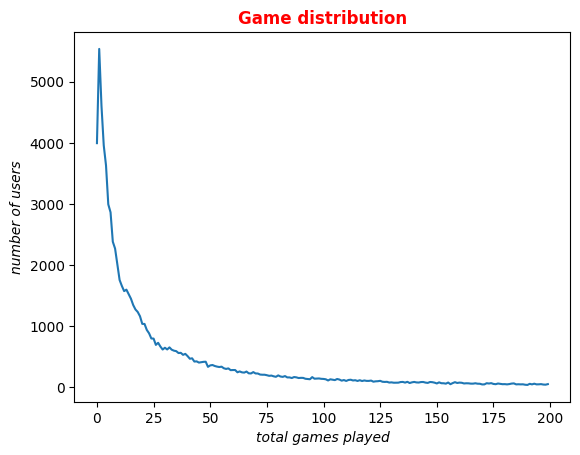

In [58]:
#plot the distribution of the number of games played in the first week
plot = game.groupby('sum_gamerounds')['userid'].count()

#plotting a distribution of those who played 200 rounds
ax = plot.head(200).plot()
plt.title("Game distribution", fontweight = 'bold', size = 12 , color = 'red')
plt.xlabel("total games played", fontstyle = 'italic', size=10)
plt.ylabel("number of users", fontstyle = 'italic', size=10)
plt.show()

In [59]:
#find out how many people instal the game, but never play
count = 0
for x in game['sum_gamerounds']:
    if x == 0:
        count +=1
    else:
        continue
print(count)
    

3994


In [60]:
print ("Pecentage of people that installed the game but never played is: " , str(round((count / len(game)*100))) + "%")

Pecentage of people that installed the game but never played is:  4%


In [61]:
#What is a percentage of people that played the game and came back after 7 days?
retention_one = round(game['retention_1'].mean()*100)
retention_seven =  round(game['retention_7'].mean()*100)
print ("One day retention scenario " , str(retention_one), "%\n"
"Seven day retention scenario ", str(retention_seven), "%")

One day retention scenario  45 %
Seven day retention scenario  19 %


Now we kow that a little less than 50% of players are coming back after Day 1, but only about 20% come back after 7 days. Now let's take a look at our AB testing.

In [62]:
#calculating 1/7 day retention for each of the groups
group1 = game.groupby('version').agg({"userid": "count",'sum_gamerounds' : 'sum', 'retention_1' : 'mean',
 'retention_7' : 'mean'                                      })
group1
#Gate_30 version is slightly better at both Day 1 and Day 7 retention (44.8% vs 44.2% and 19% vs 18.2%, respectively)

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,2344795,0.448188,0.190201
gate_40,45489,2333530,0.442283,0.182000
